In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [15]:
data = pd.read_csv("ds/istanbul_weather.csv")
data.head()

,date,meantemp (°C),humidity (%),windspeed (m/s),meanpressure (hPa)
0,1-11-2024,17.0,75,5.0,1012
1,2-11-2024,18.0,80,4.0,1011
2,3-11-2024,18.0,75,5.0,1013
3,4-11-2024,20.0,70,4.0,1010
4,5-11-2024,20.0,70,5.0,1012


In [16]:
data.describe()

,meantemp (°C),humidity (%),windspeed (m/s),meanpressure (hPa)
count,30.000000,30.00000,30.000000,30.000000
mean,15.703333,72.10000,3.953333,1015.566667
std,3.801858,10.59066,1.425079,5.636600
min,7.500000,46.00000,1.200000,1010.000000
25%,15.075000,70.00000,3.000000,1012.000000
50%,17.000000,74.00000,4.000000,1013.000000
75%,18.225000,79.50000,5.000000,1016.750000
max,20.000000,88.00000,6.700000,1028.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                30 non-null     object 
 1   meantemp (°C)       30 non-null     float64
 2   humidity (%)        30 non-null     int64  
 3   windspeed (m/s)     30 non-null     float64
 4   meanpressure (hPa)  30 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


In [18]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

In [19]:
meantemp_data = data[['date', 'meantemp (°C)']].rename(columns= {'date': 'ds', 'meantemp (°C)': 'y'})
humidity_data = data[['date', 'humidity (%)']].rename(columns= {'date': 'ds', 'humidity (%)': 'y'})
windspeed_data = data[['date', 'windspeed (m/s)']].rename( columns= {'date': 'ds', 'windspeed (m/s)': 'y'})
pressure_data = data[['date', 'meanpressure (hPa)']].rename(columns= {'date': 'ds', 'meanpressure (hPa)': 'y'})

In [20]:
meantemp_model = Prophet()
meantemp_model.fit(meantemp_data)

16:43:09 - cmdstanpy - INFO - Chain [1] start processing
16:43:09 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
meantemp_future = meantemp_model.make_future_dataframe(periods=31)
meantemp_forecast = meantemp_model.predict(meantemp_future)

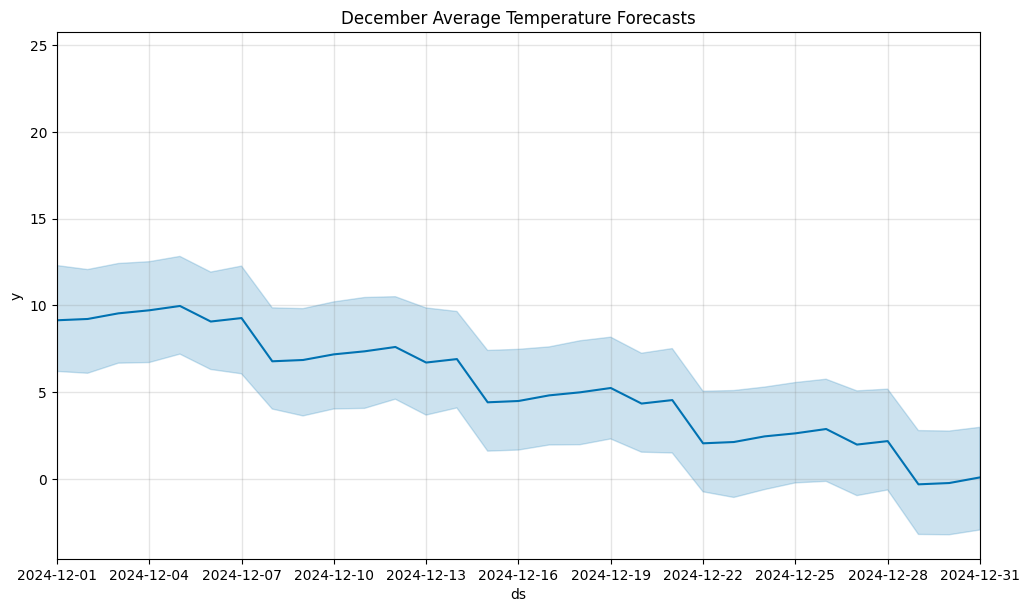

In [27]:
meantemp_model.plot(meantemp_forecast)
plt.title("December Average Temperature Forecasts")
plt.xlim(pd.to_datetime('2024-12-01'), pd.to_datetime('2024-12-31'))
plt.show()

17:44:40 - cmdstanpy - INFO - Chain [1] start processing
17:44:40 - cmdstanpy - INFO - Chain [1] done processing


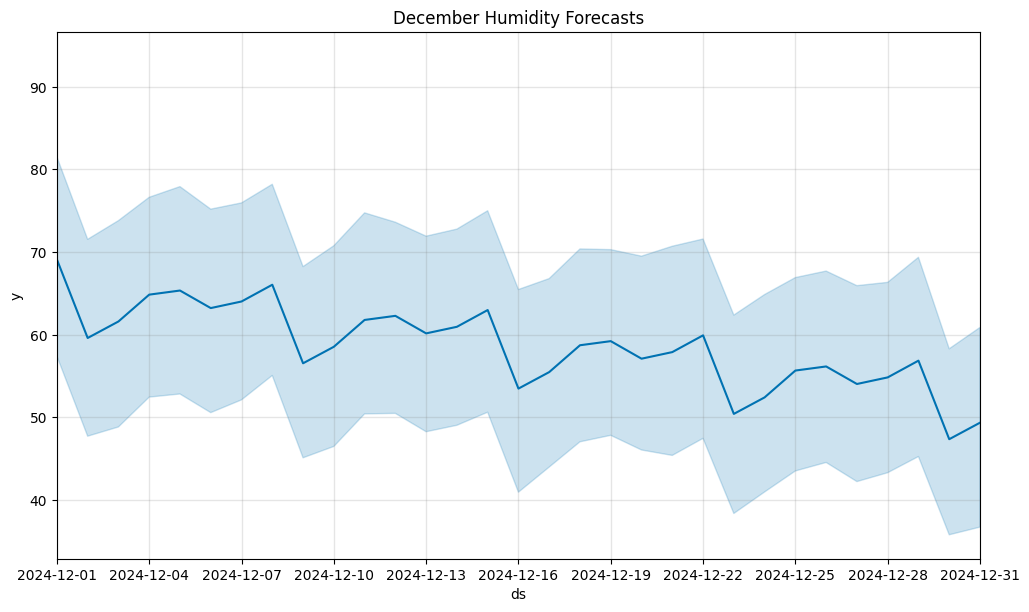

In [28]:
humdity_model = Prophet()
humdity_model.fit(humidity_data)

humidity_future = humdity_model.make_future_dataframe(periods= 31)
humdity_forecast = humdity_model.predict(humidity_future)

humdity_model.plot(humdity_forecast)
plt.xlim(pd.to_datetime('2024-12-01'), pd.to_datetime('2024-12-31'))
plt.title("December Humidity Forecasts")
plt.show()

17:45:09 - cmdstanpy - INFO - Chain [1] start processing
17:45:09 - cmdstanpy - INFO - Chain [1] done processing


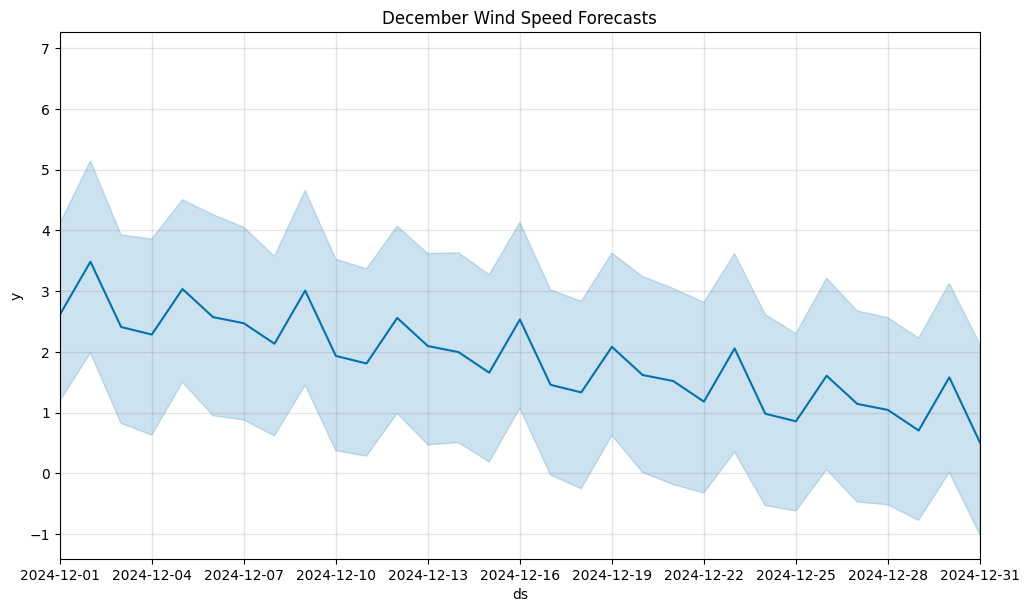

In [29]:
windspeed_model = Prophet()
windspeed_model.fit(windspeed_data)

windspeed_future = windspeed_model.make_future_dataframe(periods=31)
windspeed_forecast = windspeed_model.predict(windspeed_future)

windspeed_model.plot(windspeed_forecast)
plt.xlim(pd.to_datetime('2024-12-01'), pd.to_datetime('2024-12-31'))
plt.title("December Wind Speed Forecasts")
plt.show()

17:46:13 - cmdstanpy - INFO - Chain [1] start processing
17:46:13 - cmdstanpy - INFO - Chain [1] done processing


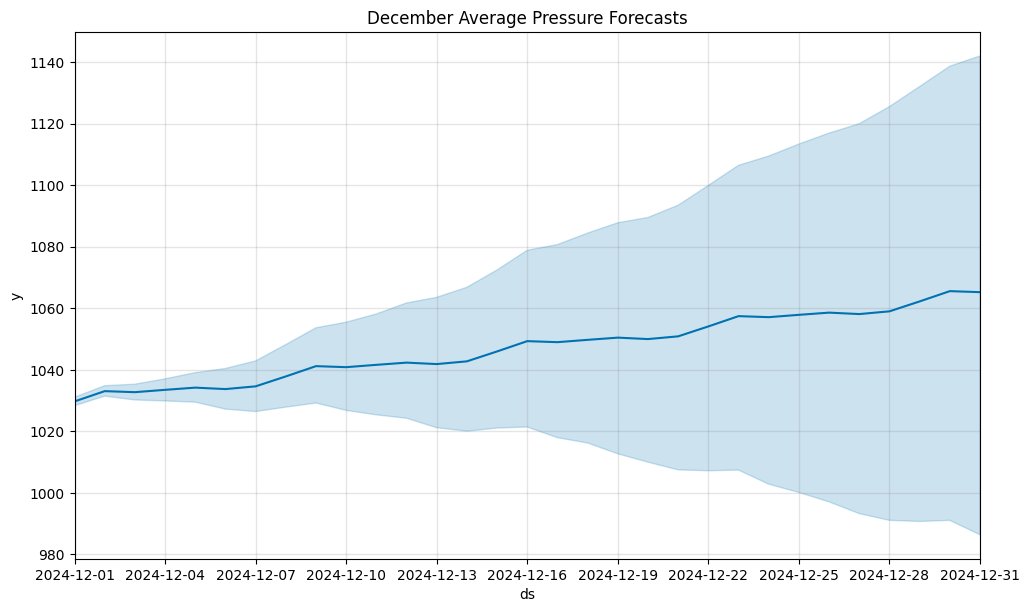

In [30]:
pressure_model = Prophet()
pressure_model.fit(pressure_data)

pressure_future = pressure_model.make_future_dataframe(periods=31)
pressure_forecast = pressure_model.predict(pressure_future)

pressure_model.plot(pressure_forecast)
plt.xlim(pd.to_datetime('2024-12-01'), pd.to_datetime('2024-12-31'))
plt.title("December Average Pressure Forecasts")
plt.show()

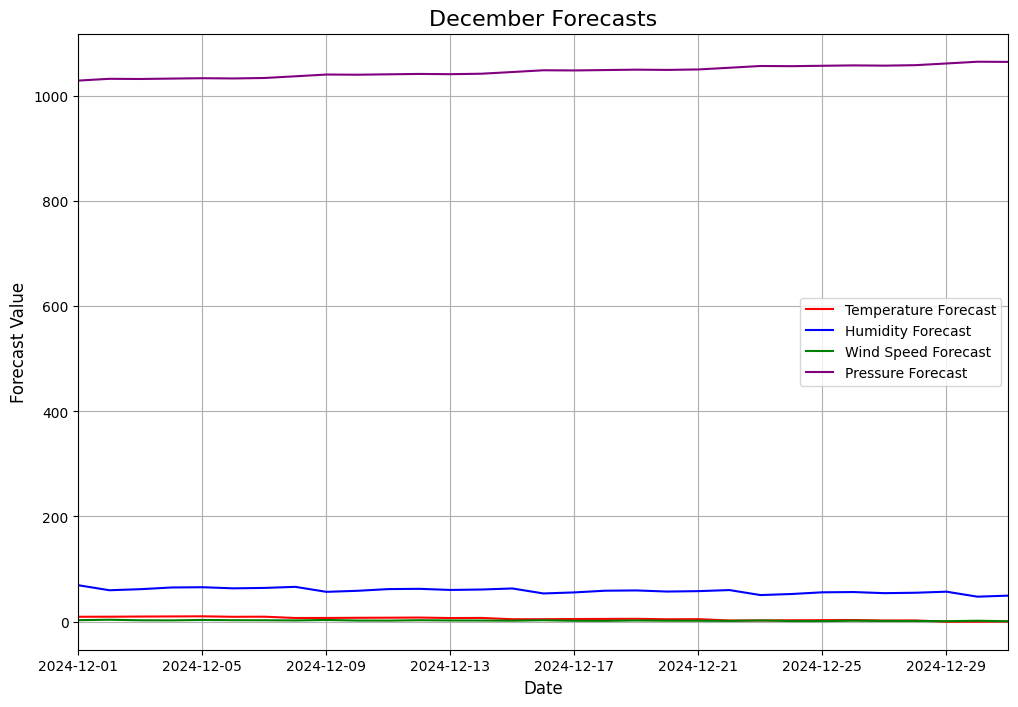

In [31]:
plt.figure(figsize=(12, 8))

plt.plot(meantemp_forecast['ds'], meantemp_forecast['yhat'], label= 'Temperature Forecast', color= 'red')
plt.plot(humdity_forecast['ds'], humdity_forecast['yhat'], label= 'Humidity Forecast', color='blue')
plt.plot(windspeed_forecast['ds'], windspeed_forecast['yhat'], label= 'Wind Speed Forecast', color= 'green')
plt.plot(pressure_forecast['ds'], pressure_forecast['yhat'], label="Pressure Forecast", color= "purple")

plt.xlim(pd.to_datetime('2024-12-01'), pd.to_datetime('2024-12-31'))
plt.title('December Forecasts', fontsize= 16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Forecast Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()